In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
climate = pd.read_csv('weather_data.csv')
climate

,city,lat,lon,month,monthnum,sunshine,rain
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01
4,San Diego,32.715736,-117.161087,May,5,277,0.02
...,...,...,...,...,...,...,...
67,Miami,25.761681,-80.191788,Aug,8,263,8.88
68,Miami,25.761681,-80.191788,Sep,9,216,9.86
69,Miami,25.761681,-80.191788,Oct,10,215,6.33
70,Miami,25.761681,-80.191788,Nov,11,212,3.27


I want to, for both city, get the average sunshine and rain per season. so for san diego, i want to see the average number of hours it rained vs was sunny for summer, spring, winter, fall.
I want to compare 2 cities based on which have the closest latitude, for west and east coast

In [3]:
def similar_lat(df):
    city_lat_dict = df.set_index('city')['lat'].to_dict()
    return city_lat_dict

similar_lat(climate)

{'San Diego': 32.715736,
 'San Francisco': 37.774929,
 'Chicago': 41.878113,
 'Houston': 29.760427,
 'New York City': 40.712776,
 'Miami': 25.761681}

In [4]:
SD_Climate = climate.copy()
SD_Climate = SD_Climate[SD_Climate['city'] == 'San Diego']
SD_Climate

,city,lat,lon,month,monthnum,sunshine,rain
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01
4,San Diego,32.715736,-117.161087,May,5,277,0.02
5,San Diego,32.715736,-117.161087,Jun,6,293,0.03
6,San Diego,32.715736,-117.161087,Jul,7,253,0.07
7,San Diego,32.715736,-117.161087,Aug,8,261,0.12
8,San Diego,32.715736,-117.161087,Sep,9,242,0.78
9,San Diego,32.715736,-117.161087,Oct,10,262,1.81


In [5]:
Miami_Climate = climate.copy()
Miami_Climate = Miami_Climate[Miami_Climate['city'] == 'Miami']
Miami_Climate

,city,lat,lon,month,monthnum,sunshine,rain
60,Miami,25.761681,-80.191788,Jan,1,222,1.62
61,Miami,25.761681,-80.191788,Feb,2,227,2.25
62,Miami,25.761681,-80.191788,Mar,3,266,3.00
63,Miami,25.761681,-80.191788,Apr,4,275,3.14
64,Miami,25.761681,-80.191788,May,5,280,5.34
65,Miami,25.761681,-80.191788,Jun,6,251,9.67
66,Miami,25.761681,-80.191788,Jul,7,267,6.50
67,Miami,25.761681,-80.191788,Aug,8,263,8.88
68,Miami,25.761681,-80.191788,Sep,9,216,9.86
69,Miami,25.761681,-80.191788,Oct,10,215,6.33


In [6]:
SD_M_Climate = climate.copy()
SD_M_Climate = SD_M_Climate[(SD_M_Climate['city'] == 'San Diego') | (SD_M_Climate['city'] == 'Miami')]
SD_M_Climate

,city,lat,lon,month,monthnum,sunshine,rain
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01
4,San Diego,32.715736,-117.161087,May,5,277,0.02
5,San Diego,32.715736,-117.161087,Jun,6,293,0.03
6,San Diego,32.715736,-117.161087,Jul,7,253,0.07
7,San Diego,32.715736,-117.161087,Aug,8,261,0.12
8,San Diego,32.715736,-117.161087,Sep,9,242,0.78
9,San Diego,32.715736,-117.161087,Oct,10,262,1.81


In [44]:
def assign_season(month_num):
    if month_num in [1,2,12]:
        return 'Winter'
    elif month_num in [3,4,5]:
        return 'Spring'
    elif month_num in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
    
SD_M_Climate['season'] = SD_M_Climate['monthnum'].apply(assign_season)
SD_M_Climate

,city,lat,lon,month,monthnum,sunshine,rain,season
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53,Winter
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15,Winter
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57,Spring
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01,Spring
4,San Diego,32.715736,-117.161087,May,5,277,0.02,Spring
5,San Diego,32.715736,-117.161087,Jun,6,293,0.03,Summer
6,San Diego,32.715736,-117.161087,Jul,7,253,0.07,Summer
7,San Diego,32.715736,-117.161087,Aug,8,261,0.12,Summer
8,San Diego,32.715736,-117.161087,Sep,9,242,0.78,Fall
9,San Diego,32.715736,-117.161087,Oct,10,262,1.81,Fall


In [8]:
SD_Climate['season'] = SD_Climate['monthnum'].apply(assign_season)
SD_Climate

,city,lat,lon,month,monthnum,sunshine,rain,season
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53,Winter
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15,Winter
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57,Spring
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01,Spring
4,San Diego,32.715736,-117.161087,May,5,277,0.02,Spring
5,San Diego,32.715736,-117.161087,Jun,6,293,0.03,Summer
6,San Diego,32.715736,-117.161087,Jul,7,253,0.07,Summer
7,San Diego,32.715736,-117.161087,Aug,8,261,0.12,Summer
8,San Diego,32.715736,-117.161087,Sep,9,242,0.78,Fall
9,San Diego,32.715736,-117.161087,Oct,10,262,1.81,Fall


In [9]:
Miami_Climate['season'] = Miami_Climate['monthnum'].apply(assign_season)
Miami_Climate

,city,lat,lon,month,monthnum,sunshine,rain,season
60,Miami,25.761681,-80.191788,Jan,1,222,1.62,Winter
61,Miami,25.761681,-80.191788,Feb,2,227,2.25,Winter
62,Miami,25.761681,-80.191788,Mar,3,266,3.00,Spring
63,Miami,25.761681,-80.191788,Apr,4,275,3.14,Spring
64,Miami,25.761681,-80.191788,May,5,280,5.34,Spring
65,Miami,25.761681,-80.191788,Jun,6,251,9.67,Summer
66,Miami,25.761681,-80.191788,Jul,7,267,6.50,Summer
67,Miami,25.761681,-80.191788,Aug,8,263,8.88,Summer
68,Miami,25.761681,-80.191788,Sep,9,216,9.86,Fall
69,Miami,25.761681,-80.191788,Oct,10,215,6.33,Fall


In [10]:
SD_M_Climate.groupby(['city','season'])[['sunshine', 'rain']].mean().reset_index()

,city,season,sunshine,rain
0,Miami,Fall,214.333333,6.486667
1,Miami,Spring,273.666667,3.826667
2,Miami,Summer,260.333333,8.350000
3,Miami,Winter,219.333333,1.970000
4,San Diego,Fall,238.666667,1.620000
5,San Diego,Spring,249.000000,0.533333
6,San Diego,Summer,269.000000,0.073333
7,San Diego,Winter,229.333333,1.220000


In [11]:
season_avg_comparison = SD_M_Climate.groupby(['city', 'season'])[['sunshine', 'rain']].mean().reset_index()

# Plotting the box plot for 'sunshine' using Plotly
fig_sunshine = px.scatter(season_avg_comparison, 
                      x='season', 
                      y='sunshine', 
                      color='city', 
                      title='Comparison of Average Hours of Sunshine for San Diego and Miami by Season',
                      labels={'sunshine': 'Average Sunshine', 'season': 'Season', 'city': 'City'})
fig_sunshine.show()

# Plotting the box plot for 'rain' using Plotly
fig_rain = px.scatter(season_avg_comparison, 
                  x='season', 
                  y='rain', 
                  color='city', 
                  title='Comparison of Average Rainfall for San Diego and Miami by Season',
                  labels={'rain': 'Average Rainfall', 'season': 'Season', 'city': 'City'})
fig_rain.show()

Show how different the amount of rain each city gets for specific seasons

scatter is better than box because it's on the same x-axis.
box is harder to read
bar doesnt work 

In [12]:
season_cities = climate.copy()
season_cities['season'] = season_cities['monthnum'].apply(assign_season)
season_cities

,city,lat,lon,month,monthnum,sunshine,rain,season
0,San Diego,32.715736,-117.161087,Jan,1,217,1.53,Winter
1,San Diego,32.715736,-117.161087,Feb,2,255,0.15,Winter
2,San Diego,32.715736,-117.161087,Mar,3,234,0.57,Spring
3,San Diego,32.715736,-117.161087,Apr,4,236,1.01,Spring
4,San Diego,32.715736,-117.161087,May,5,277,0.02,Spring
...,...,...,...,...,...,...,...,...
67,Miami,25.761681,-80.191788,Aug,8,263,8.88,Summer
68,Miami,25.761681,-80.191788,Sep,9,216,9.86,Fall
69,Miami,25.761681,-80.191788,Oct,10,215,6.33,Fall
70,Miami,25.761681,-80.191788,Nov,11,212,3.27,Fall


In [ ]:
season_avg_comparison = season_cities.groupby(['city', 'season'])[['rain','sunshine']].mean().reset_index()
season_avg_comparison

coasts = season_avg_comparison[(season_avg_comparison['city'] != 'Chicago') & (season_avg_comparison['city'] != 'Houston')]
coasts

,city,season,rain,sunshine
8,Miami,Fall,6.486667,214.333333
9,Miami,Spring,3.826667,273.666667
10,Miami,Summer,8.350000,260.333333
11,Miami,Winter,1.970000,219.333333
12,New York City,Fall,3.730000,205.666667
13,New York City,Spring,4.150000,239.333333
14,New York City,Summer,4.053333,287.333333
15,New York City,Winter,3.476667,160.000000
16,San Diego,Fall,1.620000,238.666667
17,San Diego,Spring,0.533333,249.000000


In [14]:
# Plotting the box plot for 'sunshine' using Plotly
fig_sunshine = px.bar(coasts, 
                      x='season', 
                      y='sunshine', 
                      color='city', 
                      )
fig_sunshine.show()

# Plotting the box plot for 'rain' using Plotly
fig_rain = px.bar(coasts, 
                  x='season', 
                  y='rain', 
                  color='city', 
                  )
fig_rain.show()

In [15]:
import matplotlib.pyplot as plt

In [16]:
df_sd_sf = coasts[(coasts['city'] == 'San Diego') | (coasts['city'] == 'San Francisco')]
df_sd_sf

,city,season,rain,sunshine
16,San Diego,Fall,1.620000,238.666667
17,San Diego,Spring,0.533333,249.000000
18,San Diego,Summer,0.073333,269.000000
19,San Diego,Winter,1.220000,229.333333
20,San Francisco,Fall,1.496667,233.000000
21,San Francisco,Spring,1.806667,282.000000
22,San Francisco,Summer,3.006667,206.333333
23,San Francisco,Winter,1.576667,262.000000


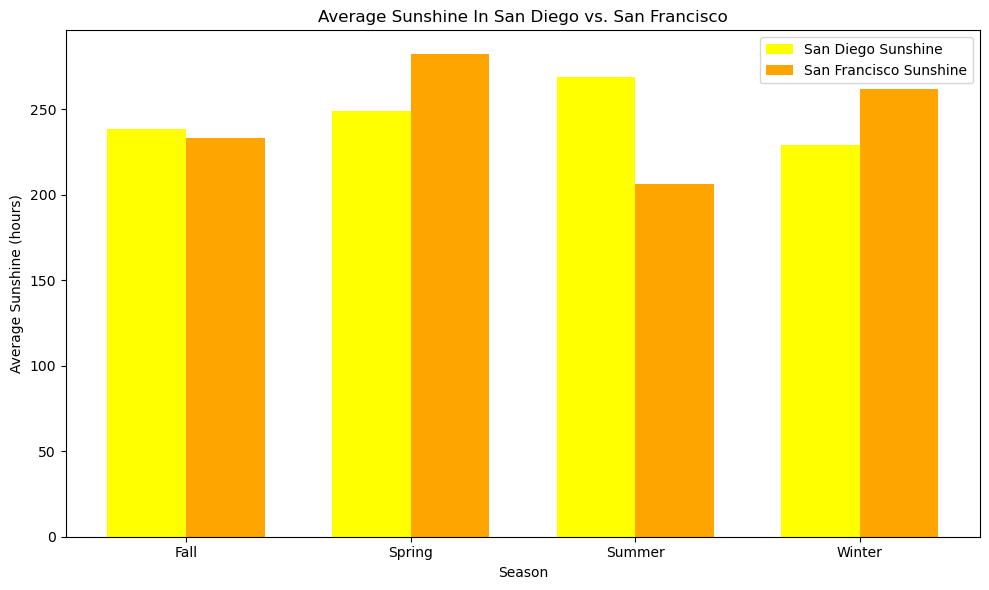

In [23]:
bar_width = 0.35
index = np.arange(len(df_sd_sf) // 2)  # As we have 2 cities (San Diego and San Francisco)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Split the DataFrame into San Diego and San Francisco
sd_df = df_sd_sf[df_sd_sf['city'] == 'San Diego']
sf_df = df_sd_sf[df_sd_sf['city'] == 'San Francisco']

# Plot the bars for Sunshine for each city side by side
bar1 = ax.bar(index - bar_width / 2, sd_df['sunshine'], bar_width, label='San Diego Sunshine', color='yellow')
bar2 = ax.bar(index + bar_width / 2, sf_df['sunshine'], bar_width, label='San Francisco Sunshine', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Season')
ax.set_ylabel('Average Sunshine (hours)')
ax.set_title('Average Sunshine In San Diego vs. San Francisco')
ax.set_xticks(index)
ax.set_xticklabels(sd_df['season'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

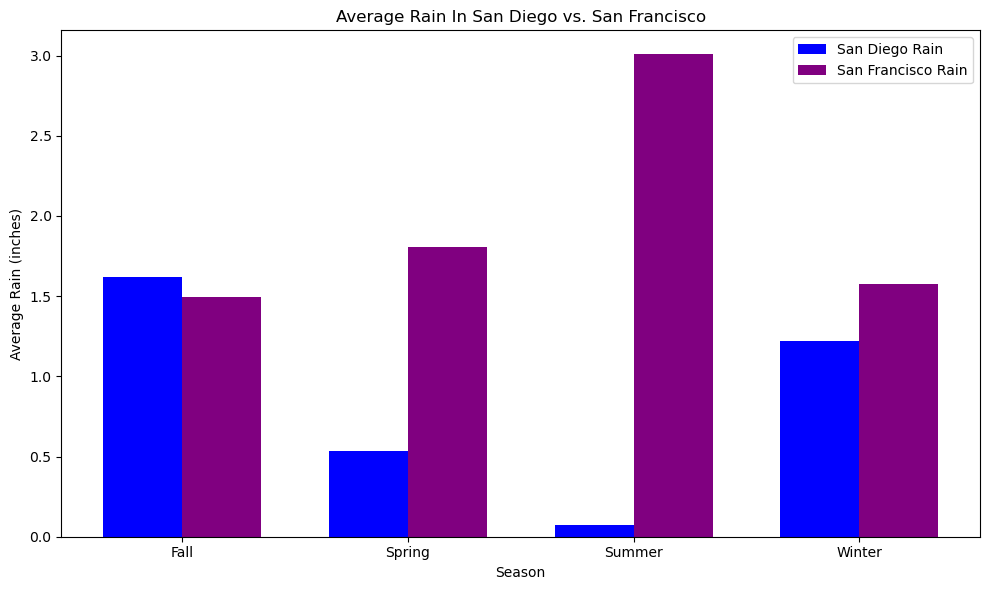

In [24]:
bar_width = 0.35
index = np.arange(len(df_sd_sf) // 2)  # As we have 2 cities (San Diego and San Francisco)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Split the DataFrame into San Diego and San Francisco
sd_df = df_sd_sf[df_sd_sf['city'] == 'San Diego']
sf_df = df_sd_sf[df_sd_sf['city'] == 'San Francisco']

# Plot the bars for Sunshine for each city side by side
bar1 = ax.bar(index - bar_width / 2, sd_df['rain'], bar_width, label='San Diego Rain', color='blue')
bar2 = ax.bar(index + bar_width / 2, sf_df['rain'], bar_width, label='San Francisco Rain', color='purple')

# Add labels, title, and legend
ax.set_xlabel('Season')
ax.set_ylabel('Average Rain (inches)')
ax.set_title('Average Rain In San Diego vs. San Francisco')
ax.set_xticks(index)
ax.set_xticklabels(sd_df['season'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
df_m_nyc = coasts[(coasts['city'] == 'Miami') | (coasts['city'] == 'New York City')]
df_m_nyc

,city,season,rain,sunshine
8,Miami,Fall,6.486667,214.333333
9,Miami,Spring,3.826667,273.666667
10,Miami,Summer,8.350000,260.333333
11,Miami,Winter,1.970000,219.333333
12,New York City,Fall,3.730000,205.666667
13,New York City,Spring,4.150000,239.333333
14,New York City,Summer,4.053333,287.333333
15,New York City,Winter,3.476667,160.000000


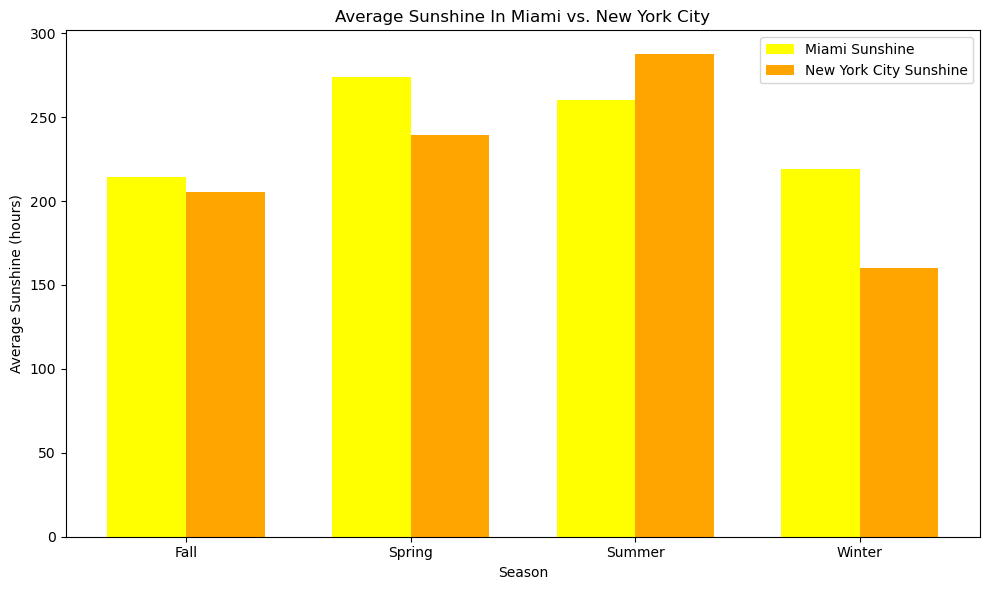

In [25]:
bar_width = 0.35
index = np.arange(len(df_m_nyc) // 2)  # As we have 2 cities (San Diego and San Francisco)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Split the DataFrame into San Diego and San Francisco
Mi_df = df_m_nyc[df_m_nyc['city'] == 'Miami']
nyc_df = df_m_nyc[df_m_nyc['city'] == 'New York City']

# Plot the bars for Sunshine for each city side by side
bar1 = ax.bar(index - bar_width / 2, Mi_df['sunshine'], bar_width, label='Miami Sunshine', color='yellow')
bar2 = ax.bar(index + bar_width / 2, nyc_df['sunshine'], bar_width, label='New York City Sunshine', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Season')
ax.set_ylabel('Average Sunshine (hours)')
ax.set_title('Average Sunshine In Miami vs. New York City')
ax.set_xticks(index)
ax.set_xticklabels(Mi_df['season'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

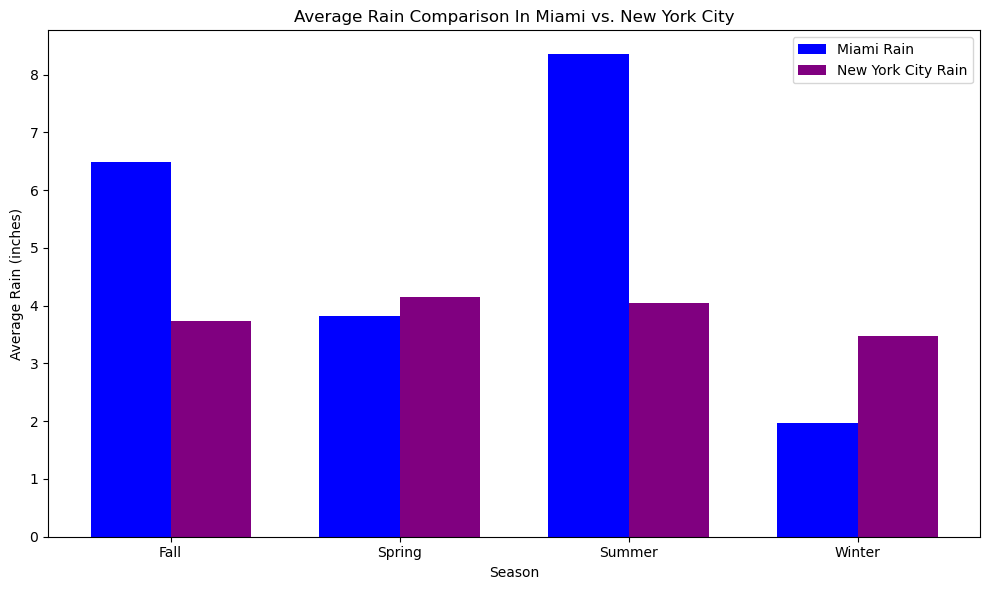

In [26]:
bar_width = 0.35
index = np.arange(len(df_m_nyc) // 2)  # As we have 2 cities (San Diego and San Francisco)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Split the DataFrame into San Diego and San Francisco
sd_df = df_m_nyc[df_m_nyc['city'] == 'Miami']
sf_df = df_m_nyc[df_m_nyc['city'] == 'New York City']

# Plot the bars for Sunshine for each city side by side
bar1 = ax.bar(index - bar_width / 2, sd_df['rain'], bar_width, label='Miami Rain', color='blue')
bar2 = ax.bar(index + bar_width / 2, sf_df['rain'], bar_width, label='New York City Rain', color='purple')

# Add labels, title, and legend
ax.set_xlabel('Season')
ax.set_ylabel('Average Rain (inches)')
ax.set_title('Average Rain Comparison In Miami vs. New York City')
ax.set_xticks(index)
ax.set_xticklabels(sd_df['season'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
sd_m_nyc = coasts[(coasts['city'] == 'Miami') | (coasts['city'] == 'San Diego')]
sd_m_nyc

,city,season,rain,sunshine
8,Miami,Fall,6.486667,214.333333
9,Miami,Spring,3.826667,273.666667
10,Miami,Summer,8.350000,260.333333
11,Miami,Winter,1.970000,219.333333
16,San Diego,Fall,1.620000,238.666667
17,San Diego,Spring,0.533333,249.000000
18,San Diego,Summer,0.073333,269.000000
19,San Diego,Winter,1.220000,229.333333


In [48]:
# fig = px.line(
#     sd_m_nyc,
#     x="season",
#     y="sunshine",
#     color="city",
#     markers=True,
#     title="Average Sunshine Comparison Between Miami and San Diego",
#     labels={"Season": "Season", "Sunshine (hrs)": "Sunshine (hours)", "City": "City"},
# )

# fig.show()

In [53]:
fig = px.line(
    sd_m_nyc,  # Data
    x="season",
    y="sunshine",
    color="city",
    markers=True,
    title="Average Sunshine Comparison Between Miami and San Diego",
    labels={"Season": "Season", "Sunshine (hrs)": "Sunshine (hours)", "City": "City"},
    line_group="city",
    color_discrete_map={"San Diego": "red", "Miami": "blue"}
)

# Customize the layout for a professional appearance
fig.update_layout(
    title={
        "text": "Average Sunshine Comparison Between Miami and San Diego",
        "x": 0.5,  # Center title
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis_title="Season",
    yaxis_title="Average Sunshine (hours)",
    legend_title="City",
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="rgba(240,240,240,1)",  # Light gray background for better contrast
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
)

# Add hover effects for more readability
fig.update_traces(
    mode="lines+markers",
    hovertemplate="<b>%{x}</b><br>City: %{customdata[0]}<br>Sunshine: %{y:.2f} hours",
    customdata=sd_m_nyc[["city"]]
)

fig.show()

In [47]:
# fig = px.line(
#     sd_m_nyc,
#     x="season",
#     y="rain",
#     color="city",
#     markers=True,
#     title="Average Sunshine Comparison Between Miami and San Diego",
#     labels={"Season": "Season", "Sunshine (hrs)": "Sunshine (hours)", "City": "City"},
# )

# fig.show()

In [43]:
fig = px.line(
    sd_m_nyc,  # Data
    x="season",
    y="rain",
    color="city",
    markers=True,
    title="Average Rain Comparison Between Miami and San Diego",
    labels={"Season": "Season", "rain": "Rain (inches)", "City": "City"},
    line_group="city"
)

# Customize the layout for a professional appearance
fig.update_layout(
    title={
        "text": "Average Rain Comparison Between Miami and San Diego",
        "x": 0.5,  # Center title
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis_title="Season",
    yaxis_title="Average Rainfall (inches)",
    legend_title="City",
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    plot_bgcolor="rgba(240,240,240,1)",  # Light gray background for better contrast
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
)

# Add hover effects for more readability
fig.update_traces(
    mode="lines+markers",
    hovertemplate="<b>%{x}</b><br>City: %{customdata[0]}<br>Rain: %{y:.2f} inches",
    customdata=sd_m_nyc[["city"]],
)

fig.show()

In [46]:
# ##
# fig = px.line(
#     SD_M_Climate,  # Data
#     x="month",
#     y="sunshine",
#     color="city",
#     markers=True,
#     title="Average Sunshine Comparison Between Miami and San Diego",
#     labels={"Season": "Season", "Sunshine (hrs)": "Sunshine (hours)", "City": "City"},
#     line_group="city"
# )

# # Customize the layout for a professional appearance
# fig.update_layout(
#     title={
#         "text": "Average Sunshine Comparison Between Miami and San Diego",
#         "x": 0.5,  # Center title
#         "xanchor": "center",
#         "yanchor": "top",
#     },
#     xaxis_title="Season",
#     yaxis_title="Average Sunshine (hours)",
#     legend_title="City",
#     font=dict(family="Arial, sans-serif", size=14, color="black"),
#     plot_bgcolor="rgba(240,240,240,1)",  # Light gray background for better contrast
#     paper_bgcolor="white",
#     xaxis=dict(showgrid=True, gridcolor="lightgray"),
#     yaxis=dict(showgrid=True, gridcolor="lightgray"),
# )

# # Add hover effects for more readability
# fig.update_traces(
#     mode="lines+markers",
#     hovertemplate="<b>%{x}</b><br>City: %{customdata[0]}<br>Sunshine: %{y:.2f} hours",
#     customdata=sd_m_nyc[["city"]],
# )

# fig.show()